# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para exibição de gráficos
%matplotlib inline

# Carregando a base de dados
# Certifique-se de que o arquivo 'sinasc_RO_2019.csv' esteja na mesma pasta que seu script/notebook
df = pd.read_csv('sinasc_RO_2019.csv')

# Visualizando as primeiras linhas para conferência
print(df.head())

   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

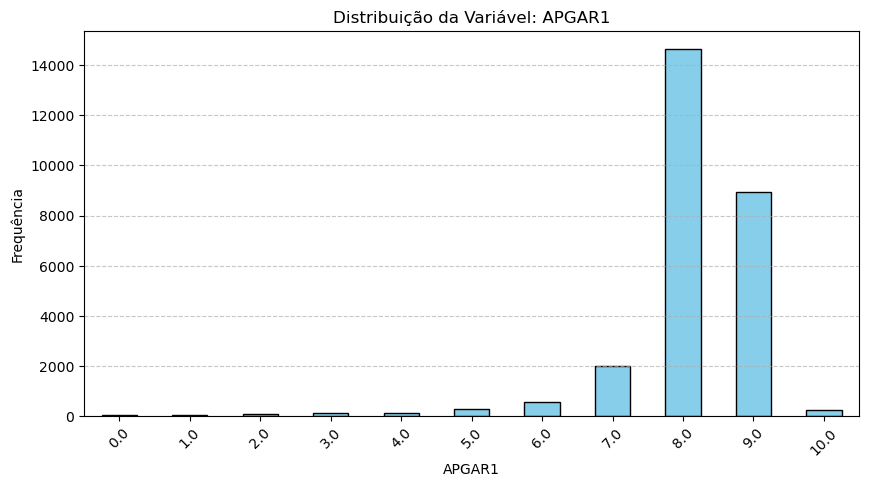

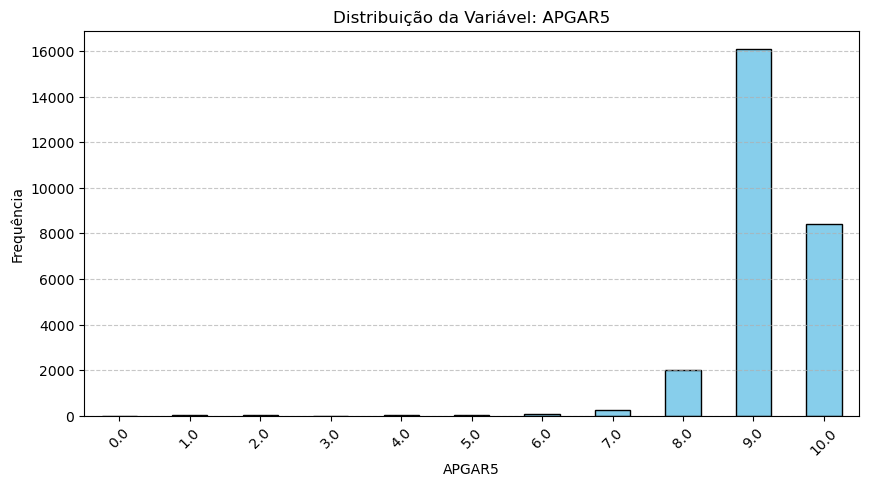

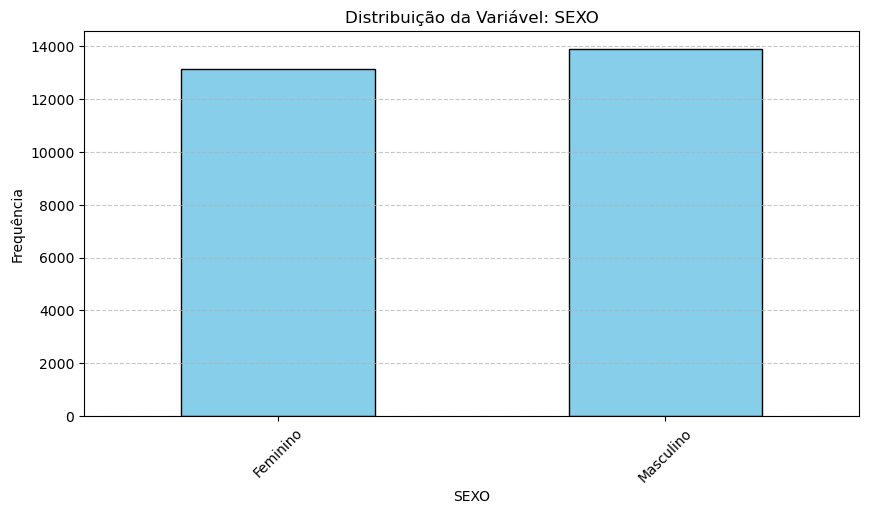

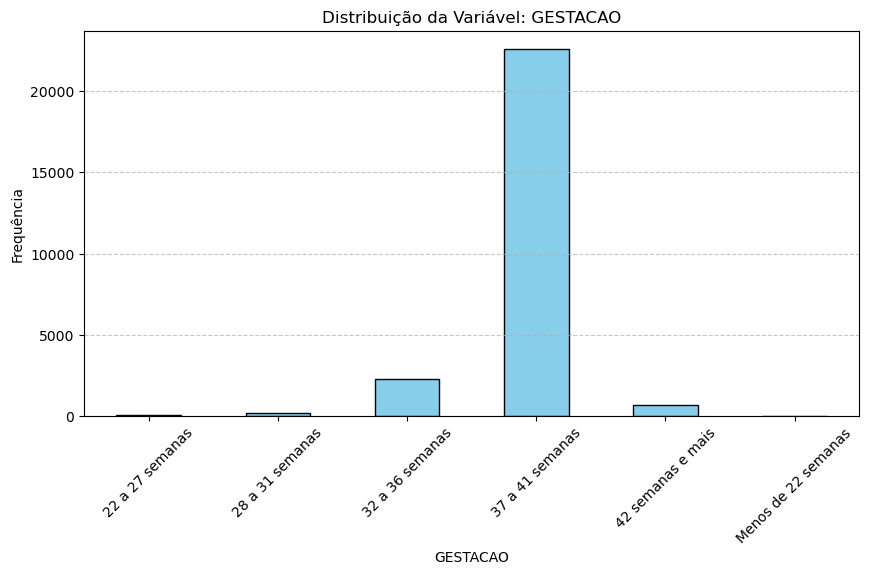

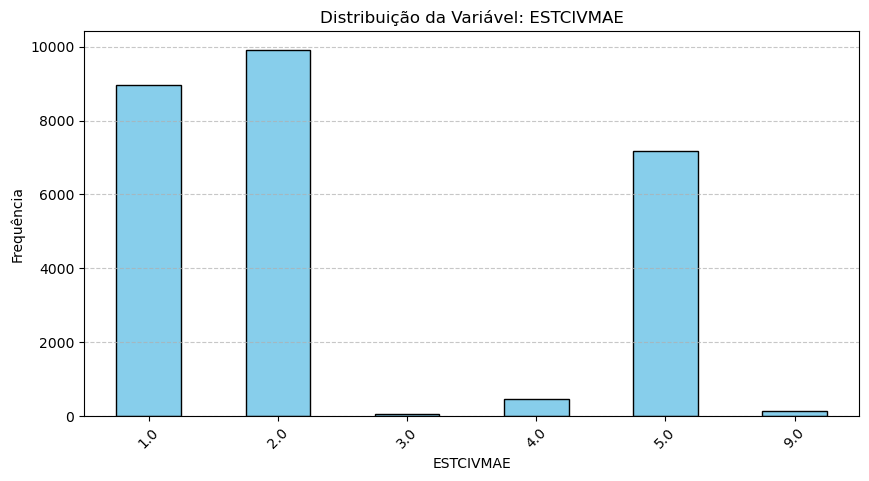

In [6]:
# Lista de variáveis para os gráficos
variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

# Loop para gerar um gráfico para cada variável
for var in variaveis:
    plt.figure(figsize=(10, 5))
    # Conta a frequência de cada valor e ordena pelo índice (categoria)
    df[var].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    
    plt.title(f'Distribuição da Variável: {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

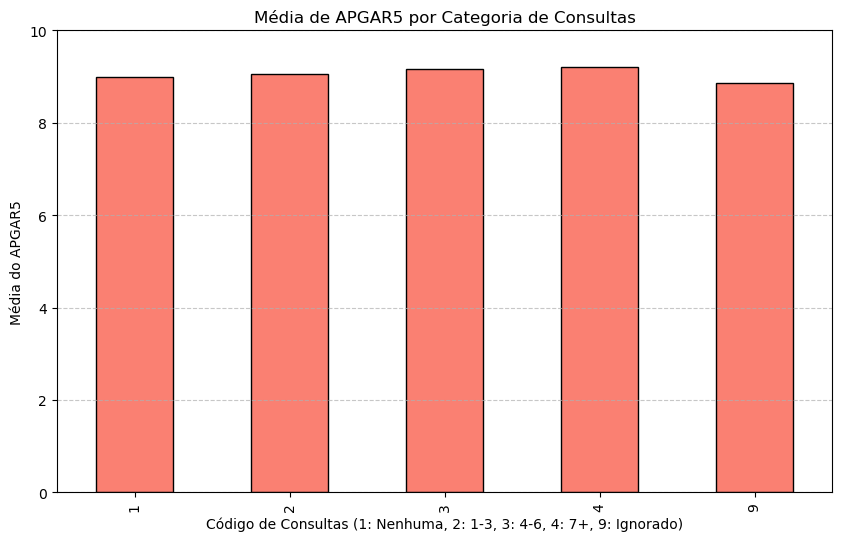

In [7]:
# Agrupando por CONSULTAS e calculando a média de APGAR5
apgar5_medio = df.groupby('CONSULTAS')['APGAR5'].mean().sort_index()

plt.figure(figsize=(10, 6))
apgar5_medio.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Média de APGAR5 por Categoria de Consultas')
plt.xlabel('Código de Consultas (1: Nenhuma, 2: 1-3, 3: 4-6, 4: 7+, 9: Ignorado)')
plt.ylabel('Média do APGAR5')
plt.ylim(0, 10) # Escala do APGAR vai de 0 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

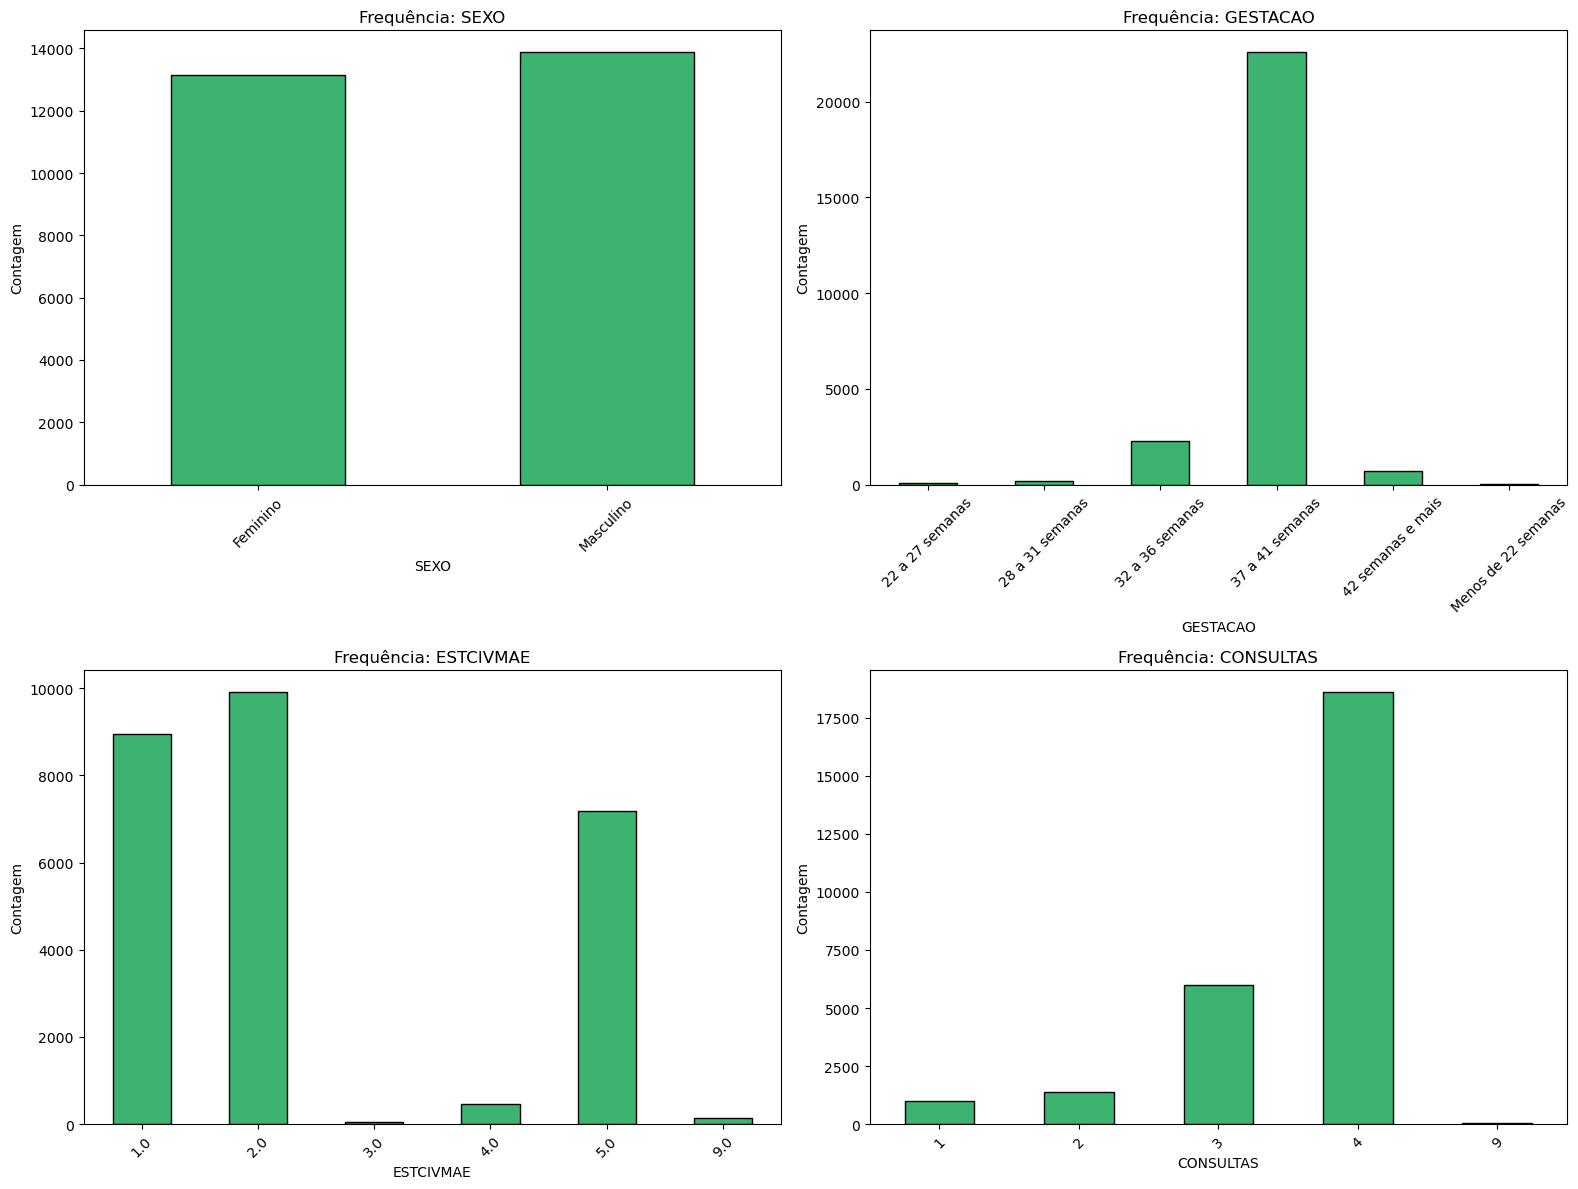

In [8]:
# Criando um painel 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Lista de colunas para o painel
colunas_painel = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']

# Iterando sobre as colunas e os eixos do painel
for i, col in enumerate(colunas_painel):
    row = i // 2
    col_idx = i % 2
    
    # Plotagem em cada quadrante
    df[col].value_counts().sort_index().plot(kind='bar', ax=axes[row, col_idx], color='mediumseagreen', edgecolor='black')
    
    axes[row, col_idx].set_title(f'Frequência: {col}')
    axes[row, col_idx].set_ylabel('Contagem')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

# Ajusta o layout para não sobrepor títulos
plt.tight_layout()
plt.show()